In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pandas.plotting import scatter_matrix
import warnings
warnings.filterwarnings("ignore")

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesRegressor

In [6]:
data= pd.read_excel("ENB2012_data.xlsx")
data

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [8]:
data.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [9]:
data.isnull().sum() #checking is there any null value or not.

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64

In [10]:
data['Y1'].value_counts()  # Here value_counts is use to check how many similar values present in Y1 column.

15.16    6
13.00    5
15.23    4
28.15    4
14.60    4
        ..
33.21    1
36.77    1
36.71    1
37.03    1
16.64    1
Name: Y1, Length: 587, dtype: int64

In [11]:
data['Y2'].value_counts() # Here value_counts is use to check how many similar values present in Y2 column.

21.33    4
29.79    4
14.27    4
17.20    4
14.28    4
        ..
14.65    1
14.54    1
14.39    1
14.46    1
17.11    1
Name: Y2, Length: 636, dtype: int64

Text(0.5, 1.0, 'Glazing Area Distribution (X8)')

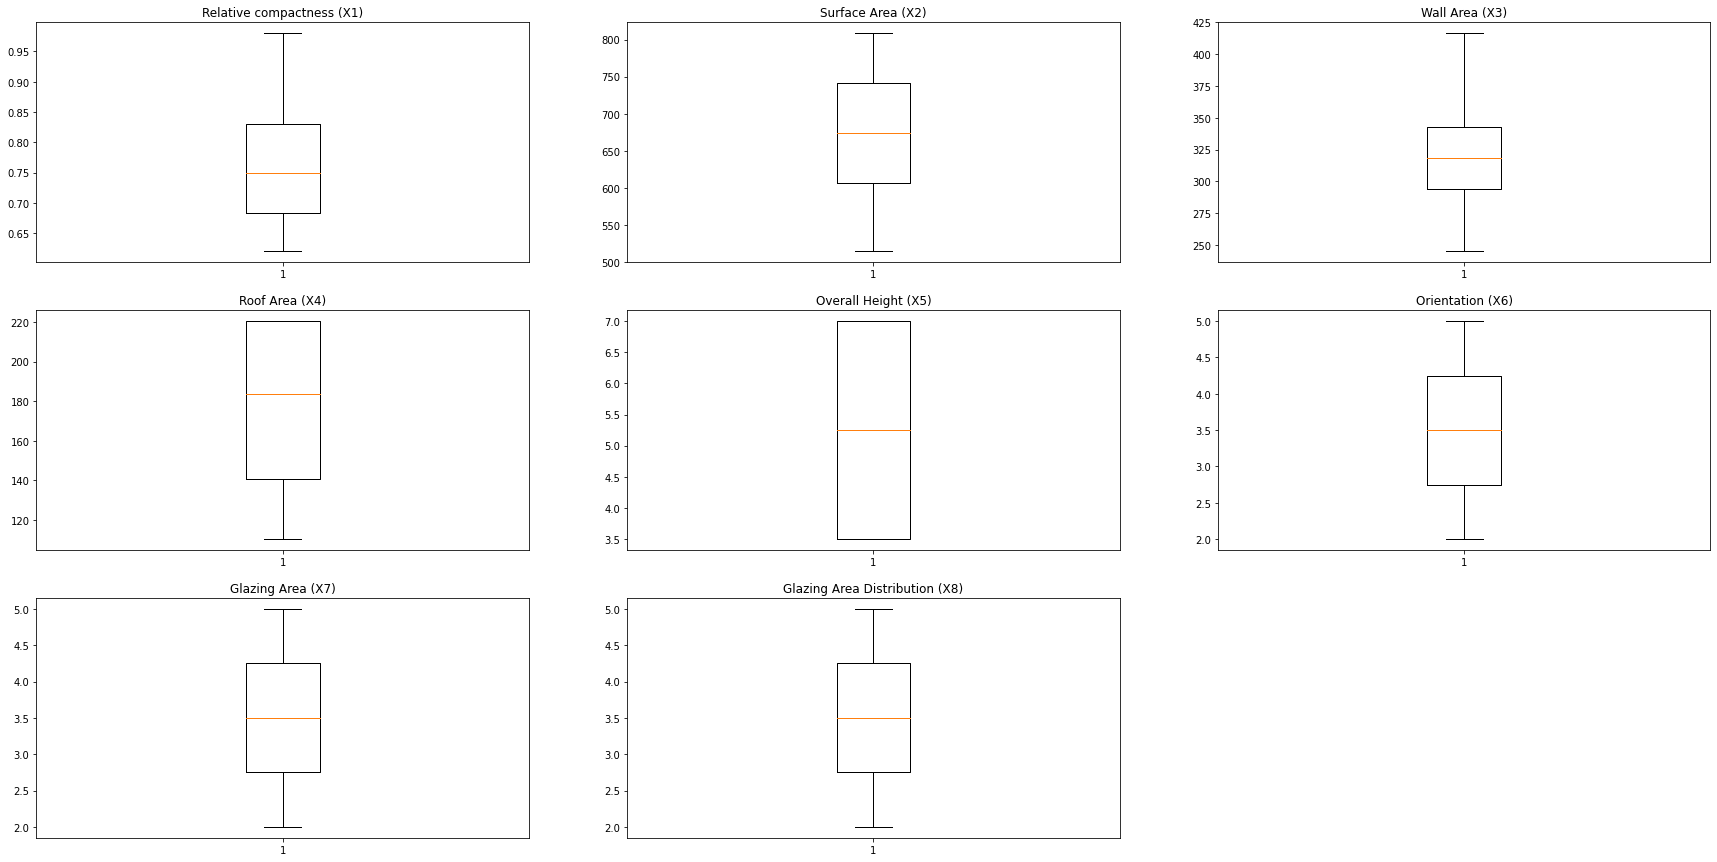

In [12]:
plt.figure(figsize = (30, 15))

ax = plt.subplot(331)
plt.boxplot(data.X1)
ax.set_title('Relative compactness (X1)')

ax = plt.subplot(332)
plt.boxplot(data.X2)
ax.set_title('Surface Area (X2)')

ax = plt.subplot(333)
plt.boxplot(data.X3)
ax.set_title('Wall Area (X3)')

ax = plt.subplot(334)
plt.boxplot(data.X4)
ax.set_title('Roof Area (X4)')

ax = plt.subplot(335)
plt.boxplot(data.X5)
ax.set_title('Overall Height (X5)')

ax = plt.subplot(336)
plt.boxplot(data.X6)
ax.set_title('Orientation (X6)')

ax = plt.subplot(337)
plt.boxplot(data.X6)
ax.set_title('Glazing Area (X7)')

ax = plt.subplot(338)
plt.boxplot(data.X6)
ax.set_title('Glazing Area Distribution (X8)')

(array([ 20., 187., 153.,  39.,  39.,  59.,  83.,  83.,  59.,  46.]),
 array([ 6.01 ,  9.719, 13.428, 17.137, 20.846, 24.555, 28.264, 31.973,
        35.682, 39.391, 43.1  ]),
 <a list of 10 Patch objects>)

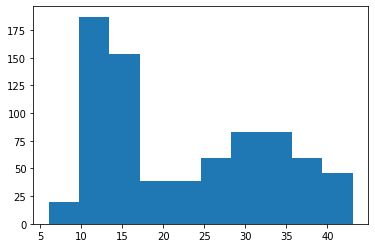

In [13]:
plt.hist((data.Y1))

(array([118., 204.,  61.,  29.,  73.,  94.,  98.,  56.,  21.,  14.]),
 array([10.9  , 14.613, 18.326, 22.039, 25.752, 29.465, 33.178, 36.891,
        40.604, 44.317, 48.03 ]),
 <a list of 10 Patch objects>)

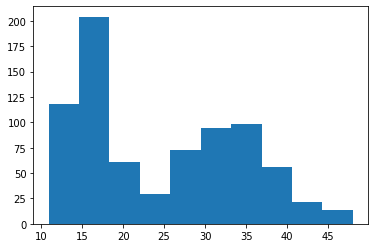

In [14]:
plt.hist((data.Y2))

(array([118., 204.,  61.,  29.,  73.,  94.,  98.,  56.,  21.,  14.]),
 array([10.9  , 14.613, 18.326, 22.039, 25.752, 29.465, 33.178, 36.891,
        40.604, 44.317, 48.03 ]),
 <a list of 10 Patch objects>)

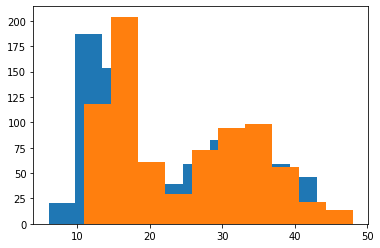

In [15]:
plt.hist((data.Y1))
plt.hist((data.Y2))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fca7660da10>,
      dtype=object)

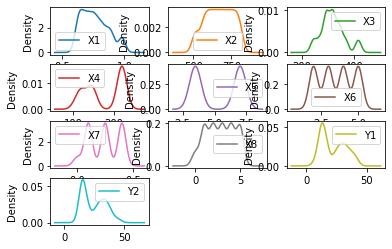

In [16]:
data.plot(kind='density', subplots=True, layout=(4,3), sharex=False, sharey=False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fca74285110>,
      dtype=object)

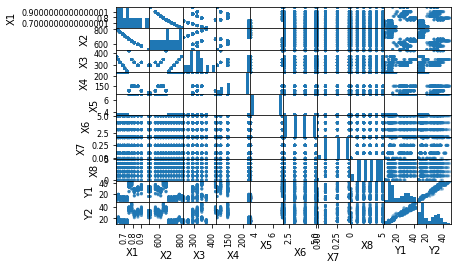

In [17]:
scatter_matrix(data)

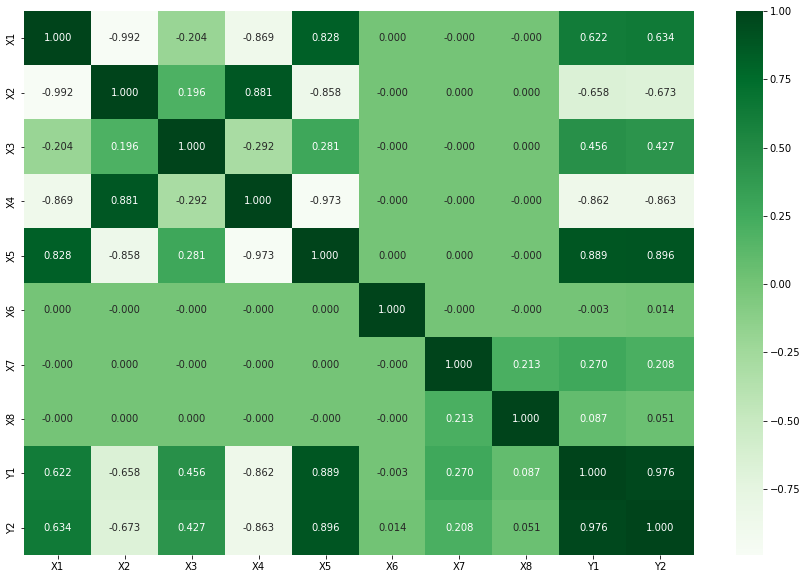

In [18]:
plt.subplots(figsize=(15,10))
sns.heatmap(data.corr(),annot=True, cmap="Greens",fmt='0.3f')  # Plotting heatmap of correlation

X5(overall_height) has the highest correlation with Y1(heating_load) and Y2(cooling_load) (which is a positive correlation), followed by X4(roof_area) for both outputs which is a negative correlation, X6(orientation) has the least correlation

[Text(0, 0, 'X1'),
 Text(0, 0, 'X2'),
 Text(0, 0, 'X3'),
 Text(0, 0, 'X4'),
 Text(0, 0, 'X5'),
 Text(0, 0, 'X6'),
 Text(0, 0, 'X7'),
 Text(0, 0, 'X8'),
 Text(0, 0, 'Y1'),
 Text(0, 0, 'Y2')]

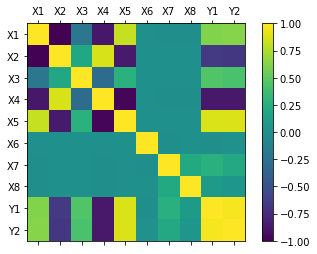

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(data.corr(), vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,10,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(data.columns)
ax.set_yticklabels(data.columns)

'overall_height' has the highest positive corelation as expected

In [20]:
# Now we split our model into X and Y parts to finally predict the results using several algorithms.

X=data[data.columns[:8]]  
Y=data['Y2']   #Dependent attribute of cooling load
print(X.shape,' ',Y.shape)

(768, 8)   (768,)


In [21]:
#Feature Selection
model = ExtraTreesRegressor()
rfe = RFE(model, n_features_to_select=3)
fit = rfe.fit(X, Y)

print("Number of Features: ", fit.n_features_)
print("Selected Features: ", fit.support_)
print("Feature Ranking: ", fit.ranking_) 

Number of Features:  3
Selected Features:  [ True False  True False  True False False False]
Feature Ranking:  [1 3 1 6 1 5 2 4]


'relative_compactness', 'surface_area' and 'overall_height' were top 3 selected features/feature combination for predicting 'cooling_load' using Recursive Feature Elimination, the 2nd and 3rd selected features were atually among the attributes with the highest correlation with the 'heating_load'

## Check of Multicollinearity

In [22]:
#Variance Inflation Factor(VIF) Calculation
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_info['Column'] = X.columns
vif_info.sort_values('VIF', ascending=False)
vif_info

,VIF,Column
0,168.948751,X1
1,inf,X2
2,inf,X3
3,inf,X4
4,134.035782,X5
5,10.796725,X6
6,4.293656,X7
7,4.496320,X8


Here we can see that multicollinearity exists so dimensionality reduction required for X1 to X6 so we try to convert them to three principal components using PCA.

## PCA

In [23]:
df1 = data[data.columns[:6]]
df1

,X1,X2,X3,X4,X5,X6
0,0.98,514.5,294.0,110.25,7.0,2
1,0.98,514.5,294.0,110.25,7.0,3
2,0.98,514.5,294.0,110.25,7.0,4
3,0.98,514.5,294.0,110.25,7.0,5
4,0.90,563.5,318.5,122.50,7.0,2
...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5
764,0.62,808.5,367.5,220.50,3.5,2
765,0.62,808.5,367.5,220.50,3.5,3
766,0.62,808.5,367.5,220.50,3.5,4


In [24]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# Scale data before applying PCA
scaling=StandardScaler()
 
# Use fit and transform method
scaling.fit(df1)
Scaled_data=scaling.transform(df1)
 
# Set the n_components=3
principal=PCA(n_components=3)
principal.fit(Scaled_data)
x=principal.transform(Scaled_data)
 
# Check the dimensions of data after PCA
print(x.shape)

(768, 3)


In [25]:
# Check the values of eigen vectors
# prodeced by principal components
principal.components_

array([[ 4.95951415e-01, -5.01733022e-01,  3.25142980e-02,
        -5.04962227e-01,  4.96237987e-01, -1.86320510e-17],
       [-2.44734692e-01,  2.31540671e-01,  8.94291660e-01,
        -2.06120761e-01,  2.10358046e-01, -8.35832914e-16],
       [ 4.71844785e-16, -4.07896776e-16, -4.92680493e-16,
         4.48249843e-16, -4.39837767e-16, -1.00000000e+00]])

Text(0.5, 0, 'PC3')

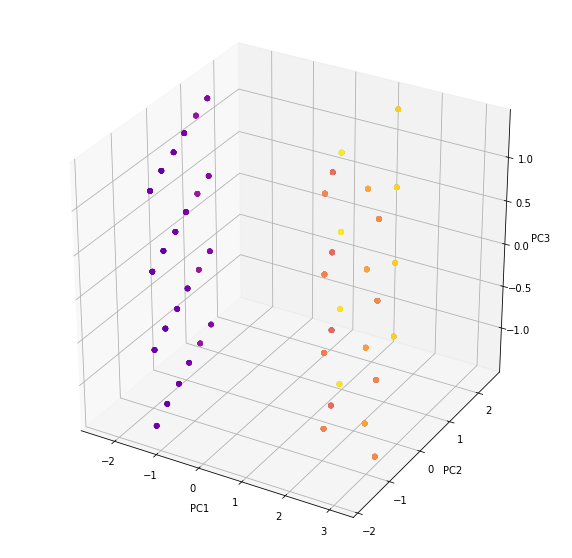

In [26]:
# import relevant libraries for 3d graph
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
 
# choose projection 3d for creating a 3d graph
axis = fig.add_subplot(111, projection='3d')
 
# x[:,0]is pc1,x[:,1] is pc2 while x[:,2] is pc3
axis.scatter(x[:,0],x[:,1],x[:,2], c=data['Y1'],cmap='plasma')
axis.set_xlabel("PC1", fontsize=10)
axis.set_ylabel("PC2", fontsize=10)
axis.set_zlabel("PC3", fontsize=10)

Text(0.5, 0, 'PC3')

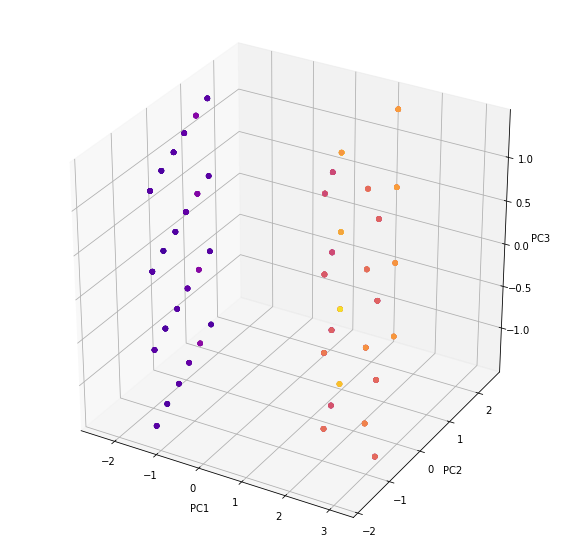

In [27]:
# import relevant libraries for 3d graph
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
 
# choose projection 3d for creating a 3d graph
axis = fig.add_subplot(111, projection='3d')
 
# x[:,0]is pc1,x[:,1] is pc2 while x[:,2] is pc3
axis.scatter(x[:,0],x[:,1],x[:,2], c=data['Y2'],cmap='plasma')
axis.set_xlabel("PC1", fontsize=10)
axis.set_ylabel("PC2", fontsize=10)
axis.set_zlabel("PC3", fontsize=10)

In [28]:
# check how much variance is explained by each principal component
print(principal.explained_variance_ratio_)

[0.61715655 0.20664189 0.16666667]


In [29]:
#Combining PCAs to remaining attributes X7 and X8
x = pd.DataFrame(x,columns={'X11','X21','X31'})
# print((x))
df2 = data[data.columns[6:]]
# print((df2))
new_data = pd.concat([x,data[data.columns[6:]]],axis=1)
new_data

,X11,X21,X31,X7,X8,Y1,Y2
0,3.128954,-0.902373,1.341641,0.0,0,15.55,21.33
1,3.128954,-0.902373,0.447214,0.0,0,15.55,21.33
2,3.128954,-0.902373,-0.447214,0.0,0,15.55,21.33
3,3.128954,-0.902373,-1.341641,0.0,0,15.55,21.33
4,2.355562,-0.141667,1.341641,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...
763,-2.191623,0.674563,-1.341641,0.4,5,17.88,21.40
764,-2.406826,1.287857,1.341641,0.4,5,16.54,16.88
765,-2.406826,1.287857,0.447214,0.4,5,16.44,17.11
766,-2.406826,1.287857,-0.447214,0.4,5,16.48,16.61


In [30]:
Xnew = new_data[new_data.columns[:5]]
Ynew = new_data[new_data.columns[5:]]
print(Xnew.shape,Ynew.shape)

(768, 5) (768, 2)


In [31]:
from sklearn.model_selection import train_test_split
Xnew_train, Xnew_test, ynew_train, ynew_test = train_test_split(Xnew, Ynew, test_size = 0.3, random_state = 10)

# Cooling Load(Y2)

## Linear Regression

In [32]:
from sklearn.linear_model import LinearRegression  # fitting model
new_model_cl=LinearRegression().fit(Xnew_train,ynew_train.Y2)
new_model_cl

LinearRegression()

In [33]:
pred_val_cl = new_model_cl.predict(Xnew_test)

Text(0, 0.5, 'Predicted_values')

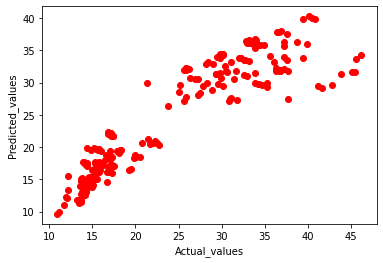

In [34]:
# plot a scatter plot
plt.scatter(ynew_test.Y2,pred_val_cl,c="r");plt.xlabel("Actual_values");plt.ylabel("Predicted_values")

In [35]:
m,b=np.polyfit(ynew_test.Y2,pred_val_cl,1)

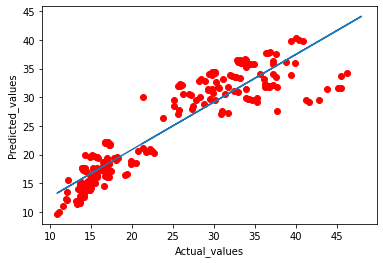

In [36]:
plt.scatter(ynew_test.Y2,pred_val_cl,c="r");plt.xlabel("Actual_values");plt.ylabel("Predicted_values") ;plt.plot(data.Y2,m*data.Y2+b)

In [37]:
# Calculating R2 score 
from sklearn.metrics import r2_score
R2_LR_cl=np.mean(r2_score(ynew_test.Y2,pred_val_cl))   #R squared score of complete Y
R2_LR_cl

0.8481650414053789

In [38]:
# RMSE for Cooling load
from sklearn.metrics import mean_squared_error

from math import sqrt
rmse_lr_cl = sqrt(mean_squared_error(ynew_test.Y2,pred_val_cl))
rmse_lr_cl

3.7298729201363394

## Decision Tree

In [39]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor(random_state=23)
dt_model.fit(Xnew_train, ynew_train.Y2)
y_pred11 = dt_model.predict(Xnew_test)
R2_dt = np.mean(r2_score(ynew_test.Y2, y_pred11))

R2_dt

0.9729019801178235

In [40]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_dt = sqrt(mean_squared_error(ynew_test.Y2, y_pred11))

rmse_dt

1.5757123037119636

## Gradient Boosting

In [41]:
from sklearn.ensemble import GradientBoostingRegressor
GB_model= GradientBoostingRegressor()
GB_model.fit(Xnew_train, ynew_train.Y2)
GB_model.score(Xnew_test,ynew_test.Y2)

0.9748377737979732

In [42]:
y_pred12 = GB_model.predict(Xnew_test)
R2_GB = np.mean(r2_score(ynew_test.Y2, y_pred12))
R2_GB

0.9748377737979732

In [43]:
rmse_GB = sqrt(mean_squared_error(ynew_test.Y2, y_pred12))

rmse_GB

1.5183877059915412

## Random Forest

In [44]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=123)
rf_model.fit(Xnew_train, ynew_train.Y2)
y_pred13 = rf_model.predict(Xnew_test)
R2_rf = np.mean(r2_score(ynew_test.Y2, y_pred13))
R2_rf

0.9716204773278881

In [45]:
rmse_rf = sqrt(mean_squared_error(ynew_test.Y2, y_pred13))

rmse_rf

1.6125407223019956

## Support Vector Regressor

In [46]:
from sklearn.svm import SVR
model_svr=SVR().fit(Xnew_train,ynew_train.Y2)
model_svr.score(Xnew_test,ynew_test.Y2)

0.8635189393247259

In [47]:
y_pred14 = model_svr.predict(Xnew_test)
R2_svr = np.mean(r2_score(ynew_test.Y2, y_pred14))
R2_svr

0.8635189393247259

In [48]:
rmse_svr = sqrt(mean_squared_error(ynew_test.Y2, y_pred14))

rmse_svr

3.5362612500541406

In [49]:
#comparing models based on rmse value
models= pd.DataFrame({ 
"Model" : ["Linear Regression","Decision Tree","Random Forest","Gradient Boosting","Support Vector Regressor"],
"R2 Score" : [R2_LR_cl,R2_dt,R2_rf,R2_GB,R2_svr],
"RMSE Value" : [rmse_lr_cl,rmse_dt,rmse_rf,rmse_GB,rmse_svr]

})

In [50]:
models

,Model,R2 Score,RMSE Value
0,Linear Regression,0.848165,3.729873
1,Decision Tree,0.972902,1.575712
2,Random Forest,0.971620,1.612541
3,Gradient Boosting,0.974838,1.518388
4,Support Vector Regressor,0.863519,3.536261


In [51]:
models.sort_values(by="R2 Score")

,Model,R2 Score,RMSE Value
0,Linear Regression,0.848165,3.729873
4,Support Vector Regressor,0.863519,3.536261
2,Random Forest,0.971620,1.612541
1,Decision Tree,0.972902,1.575712
3,Gradient Boosting,0.974838,1.518388


In [52]:
models.sort_values(by="RMSE Value")

,Model,R2 Score,RMSE Value
3,Gradient Boosting,0.974838,1.518388
1,Decision Tree,0.972902,1.575712
2,Random Forest,0.971620,1.612541
4,Support Vector Regressor,0.863519,3.536261
0,Linear Regression,0.848165,3.729873


So according to RMSE, we can say that Gradient Boosting is better to predict Cooling Load followed by Decision Trees and Random Forest.

# For Heating Load(Y1)

In [53]:
# Now we split our model into X and Y parts to finally predict the results using several algorithms.

X=data[data.columns[:8]]  
Y=data['Y1']   #Dependent attribute of heating load
print(X.shape,' ',Y.shape)

(768, 8)   (768,)


In [54]:
#Feature Selection
model = ExtraTreesRegressor()
rfe = RFE(model, n_features_to_select=3)
fit = rfe.fit(X, Y)

print("Number of Features: ", fit.n_features_)
print("Selected Features: ", fit.support_)
print("Feature Ranking: ", fit.ranking_) 

Number of Features:  3
Selected Features:  [False  True False  True  True False False False]
Feature Ranking:  [4 1 3 1 1 6 2 5]


'surface_area', 'roof_area' and 'overall_height' were top 3 selected features/feature combination for predicting 'heating_load' using Recursive Feature Elimination, the 2nd and 3rd selected features were atually among the attributes with the highest correlation with the 'heating_load'

## Linear Regression

In [55]:
from sklearn.linear_model import LinearRegression  # fitting model
new_model_hl=LinearRegression().fit(Xnew_train,ynew_train.Y1)
new_model_hl

LinearRegression()

In [56]:
pred_val_hl = new_model_hl.predict(Xnew_test)

Text(0, 0.5, 'Predicted_values')

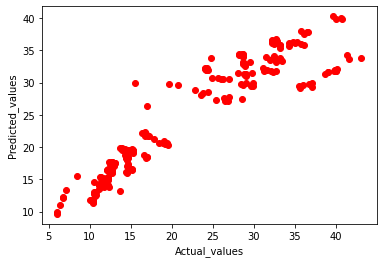

In [57]:
# plot a scatter plot
plt.scatter(ynew_test.Y1,pred_val_cl,c="r");plt.xlabel("Actual_values");plt.ylabel("Predicted_values")

In [58]:
m,b=np.polyfit(ynew_test.Y1,pred_val_hl,1)

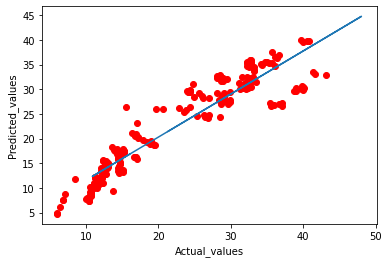

In [59]:
plt.scatter(ynew_test.Y1,pred_val_hl,c="r");plt.xlabel("Actual_values");plt.ylabel("Predicted_values") ;plt.plot(data.Y2,m*data.Y2+b)

In [60]:
# Calculating R2 score 
from sklearn.metrics import r2_score
R2_LR_hl=np.mean(r2_score(ynew_test.Y1,pred_val_hl))   #R squared score of complete Y
R2_LR_hl

0.8799764339685737

In [61]:
# RMSE for Cooling load
from sklearn.metrics import mean_squared_error

from math import sqrt
rmse_lr_hl = sqrt(mean_squared_error(ynew_test.Y1,pred_val_hl))
rmse_lr_hl

3.4994583645268222

## Decision Tree

In [62]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor(random_state=23)
dt_model.fit(Xnew_train, ynew_train.Y1)
y_pred11 = dt_model.predict(Xnew_test)
R2_dt = np.mean(r2_score(ynew_test.Y1, y_pred11))

R2_dt

0.9962275049437129

In [63]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_dt = sqrt(mean_squared_error(ynew_test.Y1, y_pred11))

rmse_dt

0.6204144544077737

## Gradient Boosting

In [64]:
from sklearn.ensemble import GradientBoostingRegressor
GB_model= GradientBoostingRegressor()
GB_model.fit(Xnew_train, ynew_train.Y1)
GB_model.score(Xnew_test,ynew_test.Y1)

0.9972433033914496

In [65]:
y_pred12 = GB_model.predict(Xnew_test)
R2_GB = np.mean(r2_score(ynew_test.Y1, y_pred12))
R2_GB

0.9972433033914496

In [66]:
rmse_GB = sqrt(mean_squared_error(ynew_test.Y1, y_pred12))

rmse_GB

0.5303493656898146

## Random Forest

In [67]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=123)
rf_model.fit(Xnew_train, ynew_train.Y1)
y_pred13 = rf_model.predict(Xnew_test)
R2_rf = np.mean(r2_score(ynew_test.Y1, y_pred13))
R2_rf

0.9972143322922021

In [68]:
rmse_rf = sqrt(mean_squared_error(ynew_test.Y1, y_pred13))

rmse_rf

0.5331288964990126

## Support Vector Regressor

In [69]:
from sklearn.svm import SVR
model_svr=SVR().fit(Xnew_train,ynew_train.Y1)
model_svr.score(Xnew_test,ynew_test.Y1)

0.879972537497932

In [70]:
y_pred14 = model_svr.predict(Xnew_test)
R2_svr = np.mean(r2_score(ynew_test.Y1, y_pred14))
R2_svr

0.879972537497932

In [71]:
rmse_svr = sqrt(mean_squared_error(ynew_test.Y1, y_pred14))

rmse_svr

3.4995151676470977

In [72]:
#comparing models based on rmse value
models= pd.DataFrame({ 
"Model" : ["Linear Regression","Decision Tree","Random Forest","Gradient Boosting","Support Vector Regressor"],
"R2 Score" : [R2_LR_hl,R2_dt,R2_rf,R2_GB,R2_svr],
"RMSE Value" : [rmse_lr_hl,rmse_dt,rmse_rf,rmse_GB,rmse_svr]

})

In [73]:
models

,Model,R2 Score,RMSE Value
0,Linear Regression,0.879976,3.499458
1,Decision Tree,0.996228,0.620414
2,Random Forest,0.997214,0.533129
3,Gradient Boosting,0.997243,0.530349
4,Support Vector Regressor,0.879973,3.499515


In [74]:
models.sort_values(by="R2 Score")

,Model,R2 Score,RMSE Value
4,Support Vector Regressor,0.879973,3.499515
0,Linear Regression,0.879976,3.499458
1,Decision Tree,0.996228,0.620414
2,Random Forest,0.997214,0.533129
3,Gradient Boosting,0.997243,0.530349


In [75]:
models.sort_values(by="RMSE Value")

,Model,R2 Score,RMSE Value
3,Gradient Boosting,0.997243,0.530349
2,Random Forest,0.997214,0.533129
1,Decision Tree,0.996228,0.620414
0,Linear Regression,0.879976,3.499458
4,Support Vector Regressor,0.879973,3.499515


So according to RMSE, we can say that Gradient Boosting is better to predict Cooling Load followed by Random Forest and  Decision Trees.